In this notebook I will model and remove the global difference of ICRF3 S/X-, K-, and X/Ka-band CRFs wrt. the Gaia-CRF3.

The global difference is modeled as a 16-parameter transformation, whose parameters are estimated through a least square fitting based on a "all" sample of all common sources and a "clean" sample.

Four criteri are applied the "all" sample to the obtain this clean sample, which are listed as followed.

- angular separation $\rho$ less than 10 mas.

- normalized separation less than $X_0 = \sqrt{2\cdot\log{N}}$, where $N$ is number of common sources. (This is case for DR2)

- normalized separation less than $X_0 = 30$, where $N$ is number of common sources. (This is case for EDR3)

- formal uncertainties in either catalog less than 10 mas.

In [1]:
import time
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

from astropy.table import Table, join

# My modules
from func_tools import vsh_fit

%config InlineBackend.figure_format = "svg"

First get positions of AGN at 4 bands from catalogs and calculate the position offset of SX-Gaia, K-Gaia, and XKa-Gaia.

In [2]:
# Fetch the positional offset wrt. Gaia position
# SX - Gaia
sx2g = Table.read("../data/icrf3sx_gedr3.fits")
sx2g.rename_column("iers_name_icrf3sx", "iers_name")

# K - Gaia
k2g = Table.read("../data/icrf3k_gedr3.fits")
k2g.rename_column("iers_name_icrf3k", "iers_name")
                 
# Ka - Gaia
ka2g = Table.read("../data/icrf3xka_gedr3.fits")
ka2g.rename_column("iers_name_icrf3xka", "iers_name")

Find the common sources in four catalogs.

In [3]:
# List of 512 common sources in four catalogs
comsou = Table.read("../data/com-sou-list.txt", format="ascii")

# Table of position offsets for 512 commom source sample
sx2gcom = join(sx2g, comsou, keys="iers_name")
k2gcom = join(k2g, comsou, keys="iers_name")
ka2gcom = join(ka2g, comsou, keys="iers_name")

In [4]:
X0sx, X0sx1 = 30, 30
X0k, X0k1 = 30, 30
X0ka, X0ka1 = 30, 30

# 1. VSH parameters fitted to ICRF3 S/X minus Gaia-CRF3

## 1.1 Using all common sources

In [5]:
# Print results
comment = ["Transformation parameters of position offset of "
           "ICRF3 SX - Gaia EDR3 based on {:d} sources".format(len(sx2g)),
           "Created at {}".format(time.asctime())]

w2, sig2, corrcoef2 = vsh_fit(sx2g, comment[0], "icrf3_sx_gaia_edr3_vsh02_all.log")

Transformation parameters of position offset of ICRF3 SX - Gaia EDR3 based on 3142 sources
VSH parameter Estimate Error
                uas     uas 
------------- -------- -----
           D1      -30    29
           D2       22    27
           D3       -0    29
           R1        1    30
           R2       22    29
           R3      -32    26
         E22R       31    17
         E22I       -6    17
         E21R       -8    34
         E21I      -23    36
          E20       -8    33
         M22R       11    18
         M22I       18    18
         M21R       31    34
         M21I       52    35
          M20       20    30

Correlation coefficient
---------------------------------------------------------
          D1    D2    D3    R1    R2    R3  E22R  E22I  E21R  E21I   E20  M22R  M22I  M21R  M21I   M20
    D1  +1.0
    D2  -0.0  +1.0
    D3  -0.0  -0.0  +1.0
    R1  -0.0  +0.3  -0.1  +1.0
    R2  -0.3  +0.0  +0.1  +0.0  +1.0
    R3  +0.1  -0.1  -0.0  -0.1  -0.1  +1.0
  E2

## 1.2 using a clean sample

I use four criteria to get a clean sample.

In [6]:
# X0sx = np.sqrt(2 * np.log(len(sx2g)))

mask = ((sx2g["nor_sep"] <= X0sx) &
        (sx2g["ang_sep"] <= 10) &
        (sx2g["pos_err_max_icrf3sx"] <= 10) &
        (sx2g["pos_err_max_gedr3"] <= 10))

sx2g1 = sx2g[mask]

print("X0 for SX-Gaia is {:.2f}".format(X0sx))

print("%d sources in the ICRF3 SX-band frame are common to the Gaia-CRF3." % len(sx2g))
print("After elimination, there are %d sources in the clean sample." % len(sx2g1))

X0 for SX-Gaia is 30.00
3142 sources in the ICRF3 SX-band frame are common to the Gaia-CRF3.
After elimination, there are 2746 sources in the clean sample.


In [7]:
# Print results
comment = ["Transformation parameters of position offset of "
           "ICRF3 SX - Gaia EDR3 based on a clean sample of {:d} sources".format(len(sx2g1)),
           "Created at {}".format(time.asctime())]

w2, sig2, corrcoef2 = vsh_fit(sx2g1, comment[0], "icrf3_sx_gaia_edr3_vsh02_cln.log")

Transformation parameters of position offset of ICRF3 SX - Gaia EDR3 based on a clean sample of 2746 sources
VSH parameter Estimate Error
                uas     uas 
------------- -------- -----
           D1      -17     7
           D2       -6     7
           D3       10     7
           R1       -3     7
           R2       -6     7
           R3       -0     6
         E22R        4     4
         E22I        1     4
         E21R        0     8
         E21I       27     9
          E20       29     8
         M22R       -1     4
         M22I       -3     4
         M21R        9     9
         M21I        8     9
          M20        9     7

Correlation coefficient
---------------------------------------------------------
          D1    D2    D3    R1    R2    R3  E22R  E22I  E21R  E21I   E20  M22R  M22I  M21R  M21I   M20
    D1  +1.0
    D2  -0.0  +1.0
    D3  -0.0  -0.0  +1.0
    R1  -0.0  +0.3  -0.1  +1.0
    R2  -0.3  +0.0  +0.0  +0.0  +1.0
    R3  +0.1  -0.1  -0.0  -0.

## 1.3 using all 512 common sources

In [8]:
# Print results
comment = ["Transformation parameters of position offset of "
           "ICRF3 SX - Gaia EDR3 based on a common sample of {:d} sources".format(len(sx2gcom)),
           "Created at {}".format(time.asctime())]

w2, sig2, corrcoef2 = vsh_fit(sx2gcom, comment[0], "icrf3_sx_gaia_edr3_vsh02_com.log")

Transformation parameters of position offset of ICRF3 SX - Gaia EDR3 based on a common sample of 512 sources
VSH parameter Estimate Error
                uas     uas 
------------- -------- -----
           D1      -12    21
           D2       13    21
           D3       -5    19
           R1       16    21
           R2      -21    21
           R3      -29    20
         E22R       -2    12
         E22I       -3    13
         E21R        6    25
         E21I       59    26
          E20       56    24
         M22R      -23    12
         M22I       -1    13
         M21R      150    26
         M21I       45    27
          M20       -3    23

Correlation coefficient
---------------------------------------------------------
          D1    D2    D3    R1    R2    R3  E22R  E22I  E21R  E21I   E20  M22R  M22I  M21R  M21I   M20
    D1  +1.0
    D2  -0.0  +1.0
    D3  +0.0  +0.0  +1.0
    R1  -0.0  +0.3  -0.1  +1.0
    R2  -0.3  +0.0  +0.0  +0.0  +1.0
    R3  +0.1  -0.1  +0.0  -0.

## 1.4 using a clean sample from common sources

In [9]:
# X0sx1 = np.sqrt(2 * np.log(len(sx2gcom)))

mask = ((sx2gcom["nor_sep"] <= X0sx1) &
        (sx2gcom["ang_sep"] <= 10) &
        (sx2gcom["pos_err_max_icrf3sx"] <= 10) &
        (sx2gcom["pos_err_max_gedr3"] <= 10))


sx2gcom1 = sx2gcom[mask]

print("X0 for SX-Gaia is {:.2f}".format(X0sx1))
print("After elimination, there are {} sources in the clean common sample "
      "out of {} sources.".format(len(sx2gcom1), len(sx2gcom)))

X0 for SX-Gaia is 30.00
After elimination, there are 457 sources in the clean common sample out of 512 sources.


In [10]:
# Print results
comment = ["Transformation parameters of position offset of "
           "ICRF3 SX - Gaia EDR3 based on a common clean sample of {:d} sources".format(len(sx2gcom1)),
           "Created at {}".format(time.asctime())]

w2, sig2, corrcoef2 = vsh_fit(sx2gcom1, comment[0], "icrf3_sx_gaia_edr3_vsh02_ccl.log")

Transformation parameters of position offset of ICRF3 SX - Gaia EDR3 based on a common clean sample of 457 sources
VSH parameter Estimate Error
                uas     uas 
------------- -------- -----
           D1      -14    12
           D2       11    12
           D3        4    11
           R1        8    12
           R2      -14    12
           R3       -6    12
         E22R        6     8
         E22I        1     7
         E21R       14    15
         E21I       38    15
          E20       29    14
         M22R       -9     7
         M22I        7     7
         M21R       39    15
         M21I       13    16
          M20       16    14

Correlation coefficient
---------------------------------------------------------
          D1    D2    D3    R1    R2    R3  E22R  E22I  E21R  E21I   E20  M22R  M22I  M21R  M21I   M20
    D1  +1.0
    D2  +0.0  +1.0
    D3  -0.0  +0.1  +1.0
    R1  -0.0  +0.2  -0.1  +1.0
    R2  -0.2  +0.0  -0.0  +0.0  +1.0
    R3  +0.2  -0.0  -0.

# 2. VSH parameters fitted to ICRF3 K minus Gaia-CRF3

## 2.1  using all sources

In [11]:
# Print results
comment = ["Transformation parameters of position offset of "
           "ICRF3 K - Gaia EDR3 based on {:d} sources".format(len(k2g)),
           "Created at {}".format(time.asctime())]

w2, sig2, corrcoef2 = vsh_fit(k2g, comment[0], "icrf3_k_gaia_edr3_vsh02_all.log")

Transformation parameters of position offset of ICRF3 K - Gaia EDR3 based on 660 sources
VSH parameter Estimate Error
                uas     uas 
------------- -------- -----
           D1      -72    33
           D2       66    33
           D3        1    35
           R1        3    37
           R2        3    36
           R3       15    25
         E22R       -2    16
         E22I      -12    17
         E21R      -90    39
         E21I      -17    41
          E20       28    42
         M22R      -16    20
         M22I      -29    20
         M21R      147    40
         M21I       24    41
          M20        9    31

Correlation coefficient
---------------------------------------------------------
          D1    D2    D3    R1    R2    R3  E22R  E22I  E21R  E21I   E20  M22R  M22I  M21R  M21I   M20
    D1  +1.0
    D2  -0.0  +1.0
    D3  -0.0  +0.1  +1.0
    R1  +0.0  +0.5  -0.0  +1.0
    R2  -0.5  +0.0  +0.0  -0.0  +1.0
    R3  +0.1  -0.1  -0.1  -0.0  -0.1  +1.0
  E22R

## 2.2 using a clean sample

I use four criteria to get a clean sample.

In [12]:
# X0k = np.sqrt(2 * np.log(len(k2g)))

mask = ((k2g["nor_sep"] <= X0k) &
        (k2g["ang_sep"] <= 10) &
        (k2g["pos_err_max_icrf3k"] <= 10) &
        (k2g["pos_err_max_gedr3"] <= 10))

k2g1 = k2g[mask]

print("X0 for K-Gaia is {:.2f}".format(X0k))

print("%d sources in the ICRF3 K-band frame are common to the Gaia-CRF2." % len(k2g))
print("After elimination, there are %d sources in the clean sample." % len(k2g1))

X0 for K-Gaia is 30.00
660 sources in the ICRF3 K-band frame are common to the Gaia-CRF2.
After elimination, there are 619 sources in the clean sample.


In [13]:
# Print results
comment = ["Transformation parameters of position offset of "
           "ICRF3 K - Gaia EDR3 based on a clean sample of {:d} sources".format(len(k2g1)),
           "Created at {}".format(time.asctime())]

w2, sig2, corrcoef2 = vsh_fit(k2g1, comment[0], "icrf3_k_gaia_edr3_vsh02_cln.log")

Transformation parameters of position offset of ICRF3 K - Gaia EDR3 based on a clean sample of 619 sources
VSH parameter Estimate Error
                uas     uas 
------------- -------- -----
           D1      -20    14
           D2       56    13
           D3       29    14
           R1       11    15
           R2      -32    15
           R3      -13    10
         E22R      -10     7
         E22I       -6     7
         E21R      -19    16
         E21I      -41    17
          E20       30    17
         M22R       11     8
         M22I      -21     8
         M21R       81    16
         M21I       32    17
          M20      -20    12

Correlation coefficient
---------------------------------------------------------
          D1    D2    D3    R1    R2    R3  E22R  E22I  E21R  E21I   E20  M22R  M22I  M21R  M21I   M20
    D1  +1.0
    D2  -0.0  +1.0
    D3  -0.0  +0.0  +1.0
    R1  +0.0  +0.5  -0.0  +1.0
    R2  -0.5  +0.0  +0.0  +0.0  +1.0
    R3  +0.1  -0.0  -0.1  -0.0 

## 2.3 using all common sources

In [14]:
# Print results
comment = ["Transformation parameters of position offset of "
           "ICRF3 K - Gaia EDR3 based on all {:d} common sources".format(len(k2gcom)),
           "Created at {}".format(time.asctime())]

w2, sig2, corrcoef2 = vsh_fit(k2gcom, comment[0], "icrf3_k_gaia_edr3_vsh02_com.log")

Transformation parameters of position offset of ICRF3 K - Gaia EDR3 based on all 512 common sources
VSH parameter Estimate Error
                uas     uas 
------------- -------- -----
           D1      -25    24
           D2       50    24
           D3        7    23
           R1        6    26
           R2      -36    25
           R3       -4    17
         E22R      -13    11
         E22I       -9    12
         E21R      -56    27
         E21I       10    29
          E20       49    29
         M22R       -1    13
         M22I      -20    14
         M21R      117    28
         M21I       26    29
          M20      -17    21

Correlation coefficient
---------------------------------------------------------
          D1    D2    D3    R1    R2    R3  E22R  E22I  E21R  E21I   E20  M22R  M22I  M21R  M21I   M20
    D1  +1.0
    D2  -0.0  +1.0
    D3  -0.0  +0.1  +1.0
    R1  +0.0  +0.5  +0.0  +1.0
    R2  -0.5  +0.0  +0.0  -0.0  +1.0
    R3  +0.1  -0.1  -0.1  -0.1  -0.1  

## 2.4 Use common clean sources

In [15]:
# X0k = np.sqrt(2 * np.log(len(k2gcom)))

mask = ((k2gcom["nor_sep"] <= X0k) &
        (k2gcom["ang_sep"] <= 10) &
        (k2gcom["pos_err_max_icrf3k"] <= 10) &
        (k2gcom["pos_err_max_gedr3"] <= 10))

k2gcom1 = k2gcom[mask]

print("X0 for K-Gaia is {:.2f}".format(X0k))

print("%d sources in the ICRF3 K-band frame are common to the Gaia-CRF2." % len(k2gcom))
print("After elimination, there are %d sources in the clean sample." % len(k2gcom1))

X0 for K-Gaia is 30.00
512 sources in the ICRF3 K-band frame are common to the Gaia-CRF2.
After elimination, there are 483 sources in the clean sample.


In [16]:
# Print results
comment = ["Transformation parameters of position offset of "
           "ICRF3 K - Gaia EDR3 based on a clean sample of {:d} common sources".format(len(k2gcom1)),
           "Created at {}".format(time.asctime())]

w2, sig2, corrcoef2 = vsh_fit(k2gcom1, comment[0], "icrf3_k_gaia_edr3_vsh02_ccl.log")

Transformation parameters of position offset of ICRF3 K - Gaia EDR3 based on a clean sample of 483 common sources
VSH parameter Estimate Error
                uas     uas 
------------- -------- -----
           D1      -22    15
           D2       55    15
           D3       27    15
           R1       10    16
           R2      -30    16
           R3      -12    11
         E22R       -9     7
         E22I       -4     7
         E21R      -20    18
         E21I      -29    18
          E20       36    18
         M22R        6     9
         M22I      -19     9
         M21R       84    18
         M21I       21    18
          M20      -19    14

Correlation coefficient
---------------------------------------------------------
          D1    D2    D3    R1    R2    R3  E22R  E22I  E21R  E21I   E20  M22R  M22I  M21R  M21I   M20
    D1  +1.0
    D2  +0.0  +1.0
    D3  -0.0  +0.1  +1.0
    R1  +0.0  +0.5  -0.0  +1.0
    R2  -0.5  +0.0  +0.0  +0.0  +1.0
    R3  +0.1  -0.0  -0.1

# 3 VSH parameters fitted to ICRF3 X/Ka minus Gaia-CRF3

## 3.1  using all sources

In [17]:
# Print results
comment = ["Transformation parameters of position offset of "
           "ICRF3 X/Ka - Gaia EDR3 based on {:d} sources".format(len(ka2g)),
           "Created at {}".format(time.asctime())]

w2, sig2, corrcoef2 = vsh_fit(ka2g, comment[0], "icrf3_xka_gaia_edr3_vsh02_all.log")

Transformation parameters of position offset of ICRF3 X/Ka - Gaia EDR3 based on 576 sources
VSH parameter Estimate Error
                uas     uas 
------------- -------- -----
           D1       -4    19
           D2       27    19
           D3     -354    20
           R1      -34    20
           R2      -34    20
           R3       10    17
         E22R       -4    11
         E22I        2    11
         E21R      -72    24
         E21I      102    25
          E20      115    24
         M22R      -12    12
         M22I       11    12
         M21R       75    23
         M21I       44    24
          M20      241    21

Correlation coefficient
---------------------------------------------------------
          D1    D2    D3    R1    R2    R3  E22R  E22I  E21R  E21I   E20  M22R  M22I  M21R  M21I   M20
    D1  +1.0
    D2  -0.0  +1.0
    D3  -0.0  +0.0  +1.0
    R1  +0.1  +0.2  -0.1  +1.0
    R2  -0.2  +0.1  +0.0  +0.0  +1.0
    R3  +0.1  -0.0  -0.2  -0.0  -0.1  +1.0
  E

## 3.2 using a clean sample

In [18]:
X0ka = np.sqrt(2 * np.log(len(ka2g)))

mask = ((ka2g["nor_sep"] <= X0ka) &
        (ka2g["ang_sep"] <= 10) &
        (ka2g["pos_err_max_icrf3xka"] <= 10) &
        (ka2g["pos_err_max_gedr3"] <= 10))

ka2g1 = ka2g[mask]

print("X0 for Ka-SX is {:.2f}".format(X0ka))
print("%d sources in the ICRF3 XKa-band frame are common to the Gaia-CRF2." % len(ka2g))
print("After elimination, there are %d sources in the clean sample." % len(ka2g1))

X0 for Ka-SX is 3.57
576 sources in the ICRF3 XKa-band frame are common to the Gaia-CRF2.
After elimination, there are 200 sources in the clean sample.


In [19]:
# Print results
comment = ["Transformation parameters of position offset of "
           "ICRF3 X/Ka - Gaia EDR3 based on a clean sample of {:d} sources".format(len(ka2g1)),
           "Created at {}".format(time.asctime())]

w2, sig2, corrcoef2 = vsh_fit(ka2g1, comment[0], "icrf3_xka_gaia_edr3_vsh02_cln.log")

Transformation parameters of position offset of ICRF3 X/Ka - Gaia EDR3 based on a clean sample of 200 sources
VSH parameter Estimate Error
                uas     uas 
------------- -------- -----
           D1      -20    15
           D2      -13    15
           D3     -121    17
           R1      -41    16
           R2       -8    16
           R3       11    15
         E22R        4     9
         E22I       16    10
         E21R      -13    19
         E21I       17    21
          E20       58    21
         M22R       -0    10
         M22I        8    10
         M21R       24    19
         M21I       51    20
          M20       39    18

Correlation coefficient
---------------------------------------------------------
          D1    D2    D3    R1    R2    R3  E22R  E22I  E21R  E21I   E20  M22R  M22I  M21R  M21I   M20
    D1  +1.0
    D2  -0.0  +1.0
    D3  -0.1  +0.1  +1.0
    R1  +0.0  +0.1  -0.0  +1.0
    R2  -0.1  +0.1  +0.2  +0.0  +1.0
    R3  +0.0  -0.1  -0.2  -0

## 3.3 using all common sources

In [20]:
# Print results
comment = ["Transformation parameters of position offset of "
           "ICRF3 X/Ka - Gaia EDR3 based on {:d} common sources".format(len(ka2gcom)),
           "Created at {}".format(time.asctime())]

w2, sig2, corrcoef2 = vsh_fit(ka2gcom, comment[0], "icrf3_xka_gaia_edr3_vsh02_com.log")

Transformation parameters of position offset of ICRF3 X/Ka - Gaia EDR3 based on 512 common sources
VSH parameter Estimate Error
                uas     uas 
------------- -------- -----
           D1       -4    21
           D2       24    21
           D3     -353    21
           R1      -38    22
           R2      -34    22
           R3        9    18
         E22R       -4    11
         E22I        4    12
         E21R      -73    25
         E21I      105    27
          E20      112    25
         M22R      -14    13
         M22I       12    13
         M21R       73    25
         M21I       44    27
          M20      243    22

Correlation coefficient
---------------------------------------------------------
          D1    D2    D3    R1    R2    R3  E22R  E22I  E21R  E21I   E20  M22R  M22I  M21R  M21I   M20
    D1  +1.0
    D2  +0.0  +1.0
    D3  -0.0  +0.0  +1.0
    R1  +0.1  +0.3  -0.1  +1.0
    R2  -0.3  +0.1  -0.0  +0.0  +1.0
    R3  +0.1  -0.0  -0.2  -0.0  -0.1  +

## 3.4 using common clean sources

In [21]:
# X0ka1 = np.sqrt(2 * np.log(len(ka2gcom)))

mask = ((ka2gcom["nor_sep"] <= X0ka1) &
        (ka2gcom["ang_sep"] <= 10) &
        (ka2gcom["pos_err_max_icrf3xka"] <= 10) &
        (ka2gcom["pos_err_max_gedr3"] <= 10))

ka2gcom1 = ka2gcom[mask]

print("X0 for Ka-Gaia is {:.2f}".format(X0ka1))
print("After elimination, there are %d sources in the clean common sample "
      "out of 512 sources." % len(ka2gcom1))

X0 for Ka-Gaia is 30.00
After elimination, there are 453 sources in the clean common sample out of 512 sources.


In [22]:
# Print results
comment = ["Transformation parameters of position offset of "
           "ICRF3 X/Ka - Gaia EDR3 based on a clean sample of {:d} common sources".format(len(ka2gcom1)),
           "Created at {}".format(time.asctime())]

w2, sig2, corrcoef2 = vsh_fit(ka2gcom1, comment[0], "icrf3_xka_gaia_edr3_vsh02_ccl.log")

Transformation parameters of position offset of ICRF3 X/Ka - Gaia EDR3 based on a clean sample of 453 common sources
VSH parameter Estimate Error
                uas     uas 
------------- -------- -----
           D1      -16    15
           D2       29    14
           D3     -288    14
           R1      -22    15
           R2      -22    15
           R3       11    12
         E22R       -4     8
         E22I        7     8
         E21R      -38    17
         E21I       61    18
          E20      109    18
         M22R       -3     8
         M22I       -1     9
         M21R       48    17
         M21I       33    18
          M20      194    15

Correlation coefficient
---------------------------------------------------------
          D1    D2    D3    R1    R2    R3  E22R  E22I  E21R  E21I   E20  M22R  M22I  M21R  M21I   M20
    D1  +1.0
    D2  -0.0  +1.0
    D3  -0.0  +0.0  +1.0
    R1  +0.1  +0.3  -0.1  +1.0
    R2  -0.3  +0.1  +0.0  -0.0  +1.0
    R3  +0.1  -0.1  -

# 4 Compare fitted VSH coefficients

In [23]:
labels = ["All", "Clean","Com", "ComCln"]

colors = ["r", "b", "y", "m"]

names1 = ["$D_1$", "$D_2$", "$D_3$", "$R_1$", "$R_2$", "$R_3$"]

names2 = ["$E_{22}^R$", "$E_{22}^I$", "$E_{21}^R$", "$E_{21}^I$", "$E_{20}$",
         "$M_{22}^R$", "$M_{22}^I$", "$M_{21}^R$", "$M_{21}^I$", "$M_{20}$"]

num1 = len(names1)
width1 = 0.2
loc1 = np.arange(num1) * 2
locs1 = [loc1 + width1 * (i+3) for i in range(len(labels))]

num2 = len(names2)
width2 = 0.2
loc2 = np.arange(num2) * 2
locs2 = [loc2 + width2 * (i+3) for i in range(len(labels))]

In [24]:
def extract_value(tab_all, tab_cln, tab_com, tab_ccl, deg=1):
    
    if deg == 1:
        estimates = np.array([tab_all["Estimate"][:6],
                              tab_cln["Estimate"][:6],
                              tab_com["Estimate"][:6],
                              tab_ccl["Estimate"][:6]])

        errors = np.array([tab_all["Error"][:6],
                           tab_cln["Error"][:6],
                           tab_com["Error"][:6],
                           tab_ccl["Error"][:6]])
        
    elif deg == 2:
        estimates = np.array([tab_all["Estimate"][6:],
                              tab_cln["Estimate"][6:],
                              tab_com["Estimate"][6:],
                              tab_ccl["Estimate"][6:]])

        errors = np.array([tab_all["Error"][6:],
                           tab_cln["Error"][6:],
                           tab_com["Error"][6:],
                           tab_ccl["Error"][6:]])
    else:
        print("ERROR")
        exit(1)

    heights = 2 * errors
    bottoms = estimates - errors
    
    return estimates, errors, heights, bottoms

## 4.1 ICRF3 SX vs. Gaia-CRF3

In [25]:
vsh02_x2g_all = Table.read("../logs/icrf3_sx_gaia_edr3_vsh02_all.log", format="ascii")
vsh02_x2g_cln = Table.read("../logs/icrf3_sx_gaia_edr3_vsh02_cln.log", format="ascii")
vsh02_x2g_com = Table.read("../logs/icrf3_sx_gaia_edr3_vsh02_com.log", format="ascii")
vsh02_x2g_ccl = Table.read("../logs/icrf3_sx_gaia_edr3_vsh02_ccl.log", format="ascii")

In [26]:
estimates, errors, heights, bottoms = extract_value(
    vsh02_x2g_all, vsh02_x2g_cln, vsh02_x2g_com, vsh02_x2g_ccl, 
    deg=1)

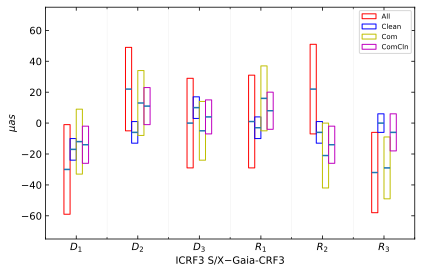

In [27]:
fig, ax = plt.subplots()

for i, colori in enumerate(colors):
    ax.bar(locs1[i], heights[i], fill=False,
           bottom=bottoms[i], edgecolor=colori,
           width=width1, align="edge", label=labels[i])
    ax.hlines(estimates[i], locs1[i], locs1[i]+width1)

ax.legend(fontsize="x-small")

ax.set_xticks(loc1+1)
ax.set_xticklabels(names1)

ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.grid(True, which="Minor")

ax.set_xlim([0, 12])
ax.set_ylim([-75, 75])

ax.set_xlabel("ICRF3 S/X$-$Gaia-CRF3")
ax.set_ylabel("$\mu as$")

plt.tight_layout()

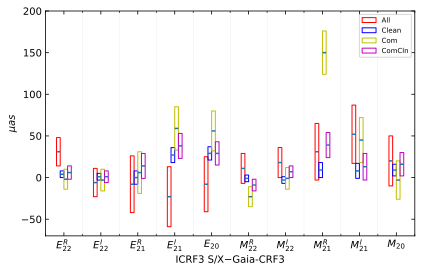

In [42]:
estimates, errors, heights, bottoms = extract_value(
    vsh02_x2g_all, vsh02_x2g_cln, vsh02_x2g_com, vsh02_x2g_ccl, 
    deg=2)

fig, ax = plt.subplots()

for i, colori in enumerate(colors):
    ax.bar(locs2[i], heights[i], fill=False,
           bottom=bottoms[i], edgecolor=colori,
           width=width2, align="edge", label=labels[i])
    ax.hlines(estimates[i], locs2[i], locs2[i]+width2)

ax.legend(fontsize="x-small")

ax.set_xticks(loc2+1)
ax.set_xticklabels(names2)

ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.grid(True, which="Minor")

ax.set_xlim([0, 20])
ax.set_ylim([-70, 200])

ax.set_xlabel("ICRF3 S/X$-$Gaia-CRF3")
ax.set_ylabel("$\mu as$")

plt.tight_layout()

The results of the degree 01 parameters agree well and it holds true for a part of the degree 02 parameters.

Large deviations could be seen for $E_{22}^R$, $E_{21}^I$, and $M_{21}^R$.

## 5.2 ICRF3 K vs. Gaia-CRF3

In [30]:
vsh02_k2g_all = Table.read("../logs/icrf3_k_gaia_edr3_vsh02_all.log", format="ascii")
vsh02_k2g_cln = Table.read("../logs/icrf3_k_gaia_edr3_vsh02_cln.log", format="ascii")
vsh02_k2g_com = Table.read("../logs/icrf3_k_gaia_edr3_vsh02_com.log", format="ascii")
vsh02_k2g_ccl = Table.read("../logs/icrf3_k_gaia_edr3_vsh02_ccl.log", format="ascii")

In [31]:
estimates, errors, heights, bottoms = extract_value(
    vsh02_k2g_all, vsh02_k2g_cln, vsh02_k2g_com, vsh02_k2g_ccl, 
    deg=1)

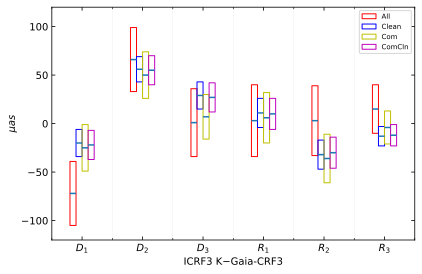

In [32]:
fig, ax = plt.subplots()

for i, colori in enumerate(colors):
    ax.bar(locs1[i], heights[i], fill=False,
           bottom=bottoms[i], edgecolor=colori,
           width=width1, align="edge", label=labels[i])
    ax.hlines(estimates[i], locs1[i], locs1[i]+width1)

ax.legend(fontsize="x-small")

ax.set_xticks(loc1+1)
ax.set_xticklabels(names1)

ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.grid(True, which="Minor")

ax.set_xlim([0, 12])
ax.set_ylim([-120, 120])

ax.set_xlabel("ICRF3 K$-$Gaia-CRF3")
ax.set_ylabel("$\mu as$")

plt.tight_layout()

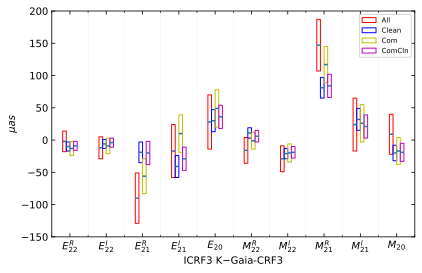

In [43]:
estimates, errors, heights, bottoms = extract_value(
    vsh02_k2g_all, vsh02_k2g_cln, vsh02_k2g_com, vsh02_k2g_ccl, 
    deg=2)

fig, ax = plt.subplots()

for i, colori in enumerate(colors):
    ax.bar(locs2[i], heights[i], fill=False,
           bottom=bottoms[i], edgecolor=colori,
           width=width2, align="edge", label=labels[i])
    ax.hlines(estimates[i], locs2[i], locs2[i]+width2)

ax.legend(fontsize="x-small")

ax.set_xticks(loc2+1)
ax.set_xticklabels(names2)

ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.grid(True, which="Minor")

ax.set_xlim([0, 20])
ax.set_ylim([-150, 200])

ax.set_xlabel("ICRF3 K$-$Gaia-CRF3")
ax.set_ylabel("$\mu as$")

plt.tight_layout()

The fitted VSH parameters from different samples generally agree with each other.

## 5.3 ICRF3 X/Ka vs. Gaia-CRF3

In [35]:
vsh02_ka2g_all = Table.read("../logs/icrf3_xka_gaia_edr3_vsh02_all.log", format="ascii")
vsh02_ka2g_cln = Table.read("../logs/icrf3_xka_gaia_edr3_vsh02_cln.log", format="ascii")
vsh02_ka2g_com = Table.read("../logs/icrf3_xka_gaia_edr3_vsh02_com.log", format="ascii")
vsh02_ka2g_ccl = Table.read("../logs/icrf3_xka_gaia_edr3_vsh02_ccl.log", format="ascii")

In [36]:
estimates, errors, heights, bottoms = extract_value(
    vsh02_ka2g_all, vsh02_ka2g_cln, vsh02_ka2g_com, vsh02_ka2g_ccl, 
    deg=1)

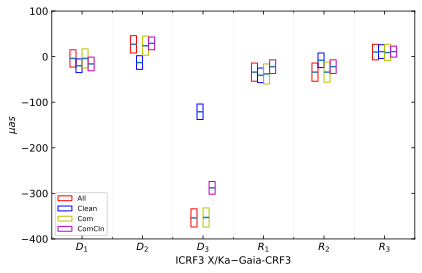

In [37]:
fig, ax = plt.subplots()

for i, colori in enumerate(colors):
    ax.bar(locs1[i], heights[i], fill=False,
           bottom=bottoms[i], edgecolor=colori,
           width=width1, align="edge", label=labels[i])
    ax.hlines(estimates[i], locs1[i], locs1[i]+width1)

ax.legend(fontsize="x-small")

ax.set_xticks(loc1+1)
ax.set_xticklabels(names1)

ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.grid(True, which="Minor")

ax.set_xlim([0, 12])
ax.set_ylim([-400, 100])

ax.set_xlabel("ICRF3 X/Ka$-$Gaia-CRF3")
ax.set_ylabel("$\mu as$")

plt.tight_layout()

The difference in the solutions with and without removal of outliers is significant for $D_3$.

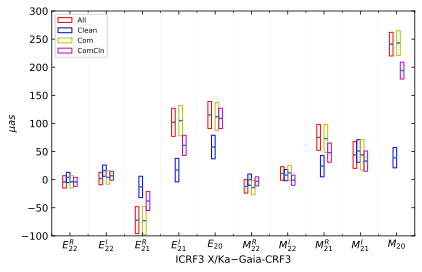

In [45]:
estimates, errors, heights, bottoms = extract_value(
    vsh02_ka2g_all, vsh02_ka2g_cln, vsh02_ka2g_com, vsh02_ka2g_ccl, 
    deg=2)

fig, ax = plt.subplots()

for i, colori in enumerate(colors):
    ax.bar(locs2[i], heights[i], fill=False,
           bottom=bottoms[i], edgecolor=colori,
           width=width2, align="edge", label=labels[i])
    ax.hlines(estimates[i], locs2[i], locs2[i]+width2)

ax.legend(fontsize="x-small")

ax.set_xticks(loc2+1)
ax.set_xticklabels(names2)

ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.grid(True, which="Minor")

ax.set_xlim([0, 20])
ax.set_ylim([-100, 300])

ax.set_xlabel("ICRF3 X/Ka$-$Gaia-CRF3")
ax.set_ylabel("$\mu as$")

plt.tight_layout()

Here we see large deviations for $E^R_{21}$, $E^I_{21}$, $E_{20}$, and $M_{20}$.

# 6 Conclusion

The most important impact of choosing different sample in the VSH fit is the terms related to the declination systematics.

At this moment, I cannot say which sample is the best since the algorithm might not be suitable for detecting outliers.

What is certain is that we should remove them.